In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from zipfile import ZipFile
with ZipFile(r'C:\Users\Aswin prabu\Downloads\flight-fare.zip','r') as zip_ref:
    zip_ref.extractall(r'C:\Users\Aswin prabu\Downloads\flight_fare')

In [4]:
df=pd.read_excel(r"C:\Users\Aswin prabu\Downloads\flight_fare\Flight_Fare.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
from datetime import datetime

In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

In [7]:
print(df['Date_of_Journey'].dtype)


datetime64[ns]


In [8]:
df['Date_of_Journey'].dt.day.unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [10]:
df.loc[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

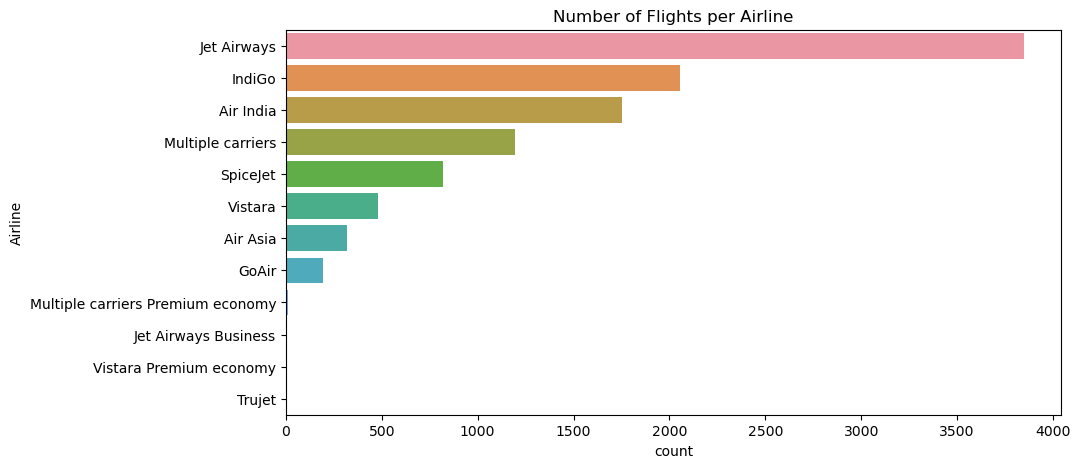

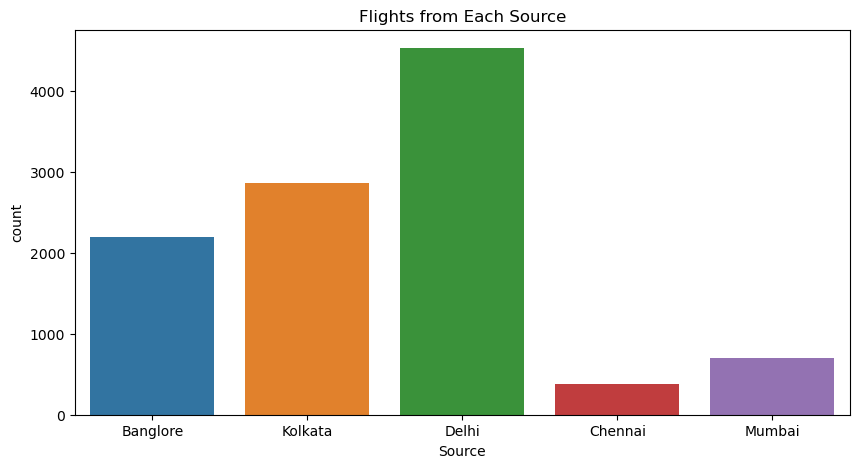

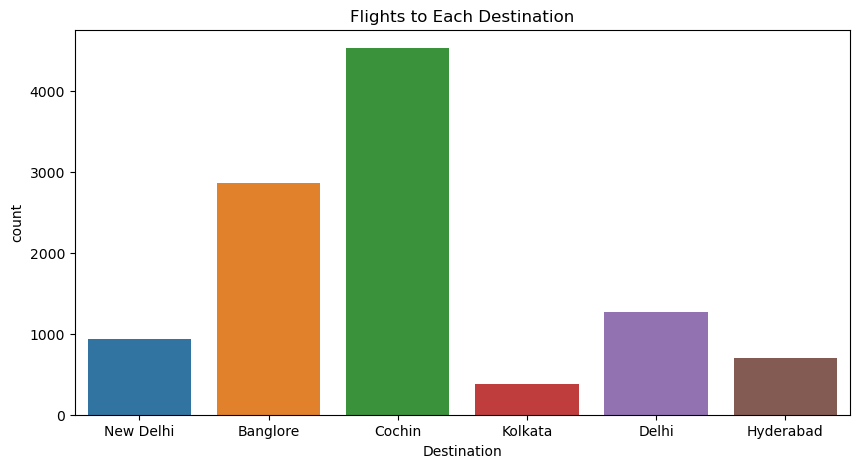

In [13]:
# Count plot for Airlines
plt.figure(figsize=(10, 5))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.show()

# Count plot for Source
plt.figure(figsize=(10, 5))
sns.countplot(x='Source', data=df)
plt.title('Flights from Each Source')
plt.show()

# Count plot for Destination
plt.figure(figsize=(10, 5))
sns.countplot(x='Destination', data=df)
plt.title('Flights to Each Destination')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


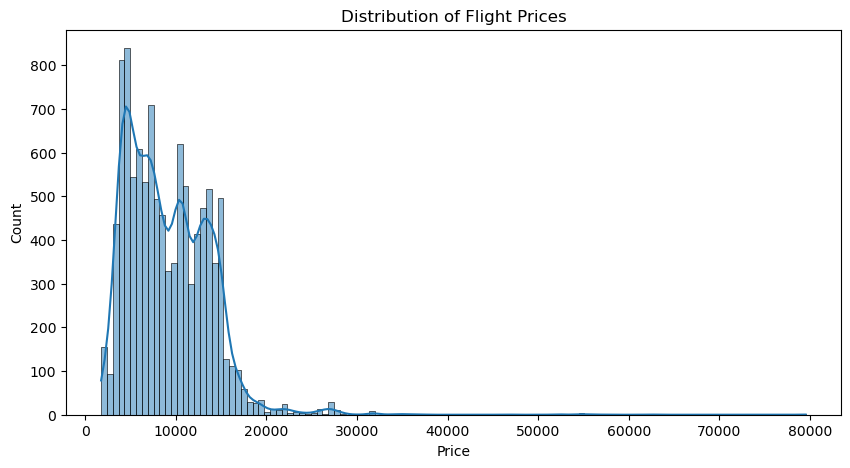

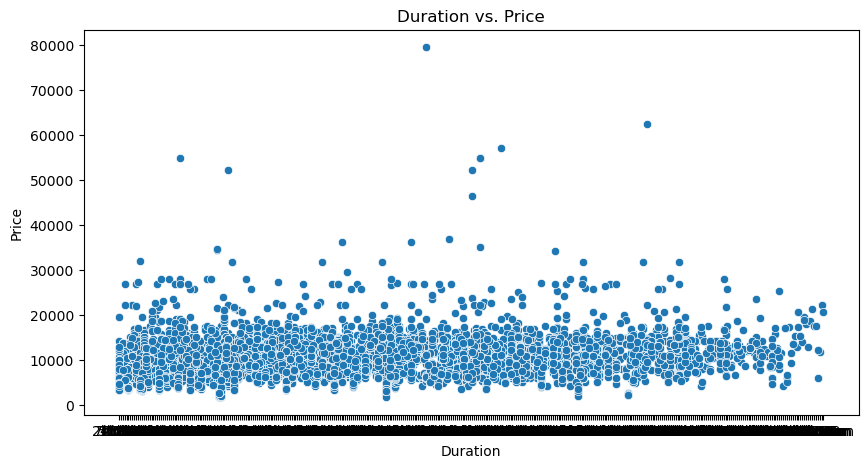

In [14]:
# Distribution of flight prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

# Relationship between Duration and Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Duration vs. Price')
plt.show()


In [15]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [18]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
Other                             36
Name: count, dtype: int64

In [17]:
# Define a threshold for rarity
threshold = 100

# Identify rare categories
value_counts = df['Additional_Info'].value_counts()
rare_categories = value_counts[value_counts < threshold].index

# Replace rare categories with 'Other'
df['Additional_Info'] = df['Additional_Info'].replace(rare_categories, 'Other')


In [19]:
rare_categories

Index(['1 Long layover', 'Change airports', 'Business class', 'No Info',
       '1 Short layover', 'Red-eye flight', '2 Long layover'],
      dtype='object', name='Additional_Info')

In [20]:
freq=df.groupby(df['Route'])['Price'].mean()

In [21]:
df['Route_target_encoded']=df['Route'].map(freq)

In [22]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
Other                             36
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  

encoded_features = encoder.fit_transform(df[['Additional_Info']])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Additional_Info']))

df_encoded = pd.concat([df.drop(columns=['Additional_Info']), encoded_df], axis=1)

df_encoded.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Route_target_encoded,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24.0,3.0,5561.114691,0.0,1.0,0.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662.0,1.0,5.0,7369.166667,0.0,1.0,0.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0,9.0,6.0,13277.195122,0.0,1.0,0.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0,12.0,5.0,6279.333333,0.0,1.0,0.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0,1.0,3.0,11313.000000,0.0,1.0,0.0


In [24]:
df=df_encoded

In [25]:
df.isnull().sum()

Airline                                         1
Date_of_Journey                                 1
Source                                          1
Destination                                     1
Route                                           1
Dep_Time                                        1
Arrival_Time                                    1
Duration                                        1
Total_Stops                                     1
Price                                           1
Journey_Day                                     1
Journey_Month                                   1
Route_target_encoded                            1
Additional_Info_No check-in baggage included    1
Additional_Info_No info                         1
Additional_Info_Other                           1
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
import re
def duration_to_minutes(duration):
    hours = minutes = 0
    match = re.match(r'(?:(\d+)h)?\s?(?:(\d+)m)?', duration)
    if match:
        hours = float(match.group(1) or 0)
        minutes = float(match.group(2) or 0)
    return hours * 60 + minutes

# Apply the function
df['Duration_minutes'] = df['Duration'].apply(duration_to_minutes)
df.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Route_target_encoded,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24.0,3.0,5561.114691,0.0,1.0,0.0,170.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662.0,1.0,5.0,7369.166667,0.0,1.0,0.0,445.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0,9.0,6.0,13277.195122,0.0,1.0,0.0,1140.0


In [28]:
import pandas as pd

def time_to_minutes(time_str):
    """Convert a time string in HH:MM format to minutes since midnight."""
    if pd.isnull(time_str):
        return None
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

df['Dep_Time_minutes'] = df['Dep_Time'].apply(time_to_minutes)

def arrival_time_to_minutes(arrival_str):
    """Convert an arrival time string to minutes since midnight."""
    if pd.isnull(arrival_str):
        return None
    time_str = arrival_str.split(' ')[0]  # Take only the time part
    return time_to_minutes(time_str)

df['Arrival_Time_minutes'] = df['Arrival_Time'].apply(arrival_time_to_minutes)

df.shape


(10681, 19)

In [29]:
correlation_arrival_price = df['Arrival_Time_minutes'].corr(df['Price'])
correlation_dep_price = df['Dep_Time_minutes'].corr(df['Price'])

print(f"Correlation between Arrival Time (minutes) and Price: {correlation_arrival_price}")
print(f"Correlation between Departure Time (minutes) and Price: {correlation_dep_price}")

Correlation between Arrival Time (minutes) and Price: 0.020858521779483732
Correlation between Departure Time (minutes) and Price: 0.0054865085473196585


## SINCE THERE IS VERY LOW CORRELATION WE CAN DROP THESE COLUMNS AS THEY WILL NOT CONTRIBUTE HEAVILY FOR ANALYSING FLIGHT PRICE

In [30]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Route_target_encoded',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Other', 'Duration_minutes',
       'Dep_Time_minutes', 'Arrival_Time_minutes'],
      dtype='object')

In [31]:
freq1=df.groupby(df['Airline'])['Price'].mean()

In [32]:
df['Airline_encoded']=df['Airline'].map(freq1)

In [33]:
categorical_features = df[['Source', 'Destination']]

encoder = OneHotEncoder(sparse=False, drop='first')

encoded_features = encoder.fit_transform(categorical_features)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Source', 'Destination']))

# Concatenate the original DataFrame with the encoded features
df_encoded = pd.concat([df.drop(columns=['Source', 'Destination']), encoded_df], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
df=df_encoded
df.head(2)

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,...,Airline_encoded,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24.0,3.0,...,5673.682903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,2019-05-01,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662.0,1.0,5.0,...,9611.204571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Total_Stops_label_encoded']=le.fit_transform(df['Total_Stops'])

In [38]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Route_target_encoded', 'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Other', 'Duration_minutes',
       'Dep_Time_minutes', 'Arrival_Time_minutes', 'Airline_encoded',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops_label_encoded'],
      dtype='object')

In [39]:
df.drop(columns=['Airline','Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Dep_Time_minutes','Arrival_Time_minutes'],axis=1,inplace=True)

In [40]:
df.head()

,Price,Journey_Day,Journey_Month,Route_target_encoded,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other,Duration_minutes,Airline_encoded,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_label_encoded
0,3897.0,24.0,3.0,5561.114691,0.0,1.0,0.0,170.0,5673.682903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,7662.0,1.0,5.0,7369.166667,0.0,1.0,0.0,445.0,9611.204571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,13882.0,9.0,6.0,13277.195122,0.0,1.0,0.0,1140.0,11643.923357,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,6218.0,12.0,5.0,6279.333333,0.0,1.0,0.0,325.0,5673.682903,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,13302.0,1.0,3.0,11313.000000,0.0,1.0,0.0,285.0,5673.682903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [41]:
y1= pd.Series(df['Price'])
x1=df.drop(columns=['Price'],axis=1)
y1.shape

(10682,)

In [53]:
# Find indexes in X that are not in y
y1_index = y1.index
x1_index = x1.index

missing_in_x1 = y1_index.difference(x1_index)
missing_in_y1 = x1_index.difference(y1_index)

print("Missing in X:", missing_in_x1)
print("Missing in y:", missing_in_y1)


Missing in X: Index([9039, 10681], dtype='int64')
Missing in y: Index([], dtype='int64')


In [54]:
# y1 = y1.to_frame(name='Price')
x1, y1 = x1.align(y1, join='inner',axis=0)

# Display the shapes and data
print("x1 shape:", x1.shape)
print("y1 shape:", y1.shape)

x1 shape: (10680, 18)
y1 shape: (10680,)


In [44]:
print(x1.index)


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       10673, 10674, 10675, 10676, 10677, 10678, 10679, 10680, 10681,  9039],
      dtype='int64', length=10682)


In [45]:
x1_cor=x1.corr()

In [46]:
def corr_func(x1, threshold):
    # Compute the correlation matrix
    x1_cor = x1.corr()
    
    cor_cols = []
    # Iterate through the columns and rows of the correlation matrix
    for i in range(len(x1_cor.columns)):
        for j in range(i):
            # Check if the correlation exceeds the threshold
            if abs(x1_cor.iloc[i, j]) > threshold:
                col_name = x1_cor.columns[j]
                if col_name not in cor_cols:
                    cor_cols.append(col_name)
                    
    return cor_cols

# Example usage
# Assuming df is your DataFrame
correlated_columns = corr_func(df, 0.9)
print(correlated_columns)

['Source_Delhi', 'Source_Mumbai', 'Source_Chennai']


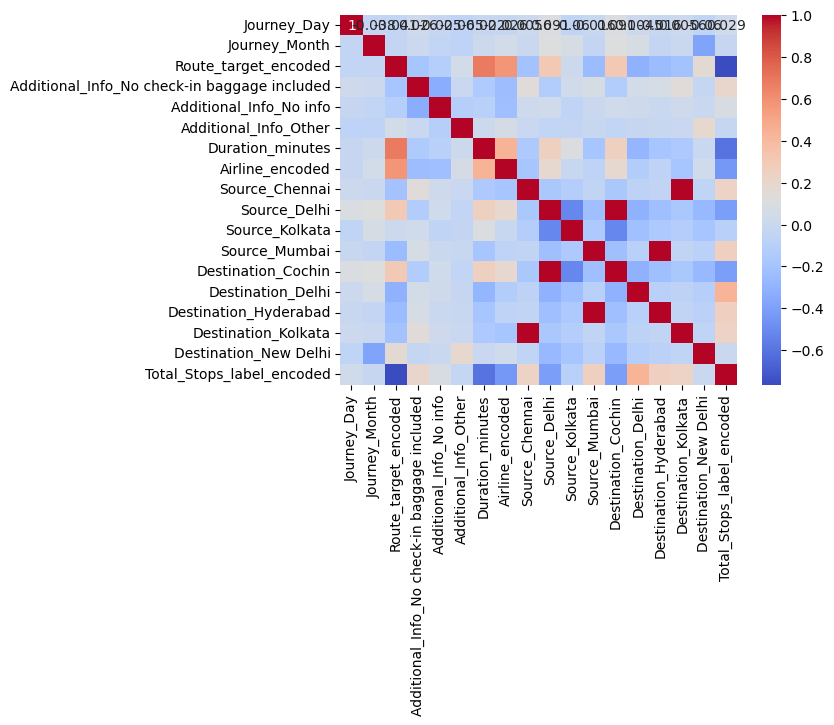

In [47]:
x1_cor=x1.corr()
sns.heatmap(data=x1_cor,annot=True,cmap='coolwarm')
# Customize the heatmap
plt.show()

In [52]:
import pandas as pd

# Assume `df` is your DataFrame

def remove_outliers_iqr(df):
    # For each numeric column, calculate Q1, Q3, and IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data by keeping only rows within the bounds
    df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_no_outliers

# Apply the function to your DataFrame
df_cleaned = remove_outliers_iqr(x1)

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


Original DataFrame shape: (10682, 19)
Cleaned DataFrame shape: (5682, 18)


## THE SIZE OF DATASET IS HALVED HENCE WE MAY NOT REMOVE THESE OUTLIERS OR ELSE OUR MODEL WILL TRAIN ON VERY LIMITED AMOUNT OF DATA

In [49]:
x1.dropna(inplace=True)

In [50]:
x1.isnull().sum()

Journey_Day                                     0
Journey_Month                                   0
Route_target_encoded                            0
Additional_Info_No check-in baggage included    0
Additional_Info_No info                         0
Additional_Info_Other                           0
Duration_minutes                                0
Airline_encoded                                 0
Source_Chennai                                  0
Source_Delhi                                    0
Source_Kolkata                                  0
Source_Mumbai                                   0
Destination_Cochin                              0
Destination_Delhi                               0
Destination_Hyderabad                           0
Destination_Kolkata                             0
Destination_New Delhi                           0
Total_Stops_label_encoded                       0
dtype: int64

In [59]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Define models and hyperparameters for GridSearchCV
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1, 10, 100]}),
    'Lasso Regression': (Lasso(), {'alpha': [0.1, 1, 10, 100]}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 40, 50, 60]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 120, 200], 'max_depth': [ 10, 20, 80]})
}

# Initialize dictionaries to store results
results = {}

# Start MLflow experiment
mlflow.set_experiment("Model Comparison Experiment")

# Train and evaluate each model with GridSearchCV
for model_name, (model, params) in tqdm(models.items(), desc='Model Training', unit='model'):
    with mlflow.start_run(run_name=model_name):
        print(f"Training {model_name}...")
        
        # Perform GridSearchCV
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Get the best model and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        # Predict and evaluate
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Log parameters, metrics, and model with MLflow
        mlflow.log_params(best_params)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        
        # Log the best model
        mlflow.sklearn.log_model(best_model, model_name.lower().replace(" ", "_") + "_model")
        
        # Store results for later use
        results[model_name] = {
            'Best Parameters': best_params,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R2: {metrics['R2']}")


Model Training:   0%|                                                                         | 0/5 [00:00<?, ?model/s]

Training Linear Regression...


2024/08/25 09:19:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Model Training:  20%|█████████████                                                    | 1/5 [00:28<01:53, 28.33s/model]

Training Ridge Regression...


2024/08/25 09:19:59 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Model Training:  40%|██████████████████████████                                       | 2/5 [00:49<01:12, 24.21s/model]

Training Lasso Regression...


2024/08/25 09:20:18 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Model Training:  60%|███████████████████████████████████████                          | 3/5 [01:08<00:43, 21.89s/model]

Training Decision Tree...


2024/08/25 09:20:36 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Model Training:  80%|████████████████████████████████████████████████████             | 4/5 [01:26<00:20, 20.05s/model]

Training Random Forest...


2024/08/25 09:22:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
Model Training: 100%|█████████████████████████████████████████████████████████████████| 5/5 [03:28<00:00, 41.72s/model]


Linear Regression:
Best Parameters: {}
MSE: 6186709.151854036
MAE: 1726.9307193517309
R2: 0.6866622163240623

Ridge Regression:
Best Parameters: {'alpha': 1}
MSE: 6187067.547953485
MAE: 1727.2138522410285
R2: 0.686644064664315

Lasso Regression:
Best Parameters: {'alpha': 0.1}
MSE: 6186622.923179944
MAE: 1726.9249677842265
R2: 0.6866665835411023

Decision Tree:
Best Parameters: {'max_depth': 40}
MSE: 4199785.209982054
MAE: 935.0734550561797
R2: 0.7872938007411591

Random Forest:
Best Parameters: {'max_depth': 80, 'n_estimators': 120}
MSE: 2640013.190613623
MAE: 834.3885264869618
R2: 0.8662914545167825


In [175]:
import pickle
with open("PREDICT_FLIGHT_FARE.pkl",'wb') as f:
    pickle.dump(best_model,f)



## random forest is best model with these particulat parameters that has a r^2 value of 86.8% hence we can use this for prediction of flight fare 
37776

In [59]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [58]:
pip install --upgrade backports.tarfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [60]:
!mlflow ui

'mlflow' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
!pip show mlflow


Name: mlflow
Version: 2.15.1
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: https://mlflow.org
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.

                                Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
